## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.1
bias = 1


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0  1.526623 -0.057564  1.506987 -1.416070  0.578149  0.617441
1 -0.416216  0.353573 -0.927582 -0.876129  1.065697  0.091956
2  0.764389  1.003002  0.631481 -0.194443 -1.250672  0.085052
3  1.388461  0.521088 -0.813887  0.265328 -1.522921  0.274917
4 -1.411122  0.497988  0.907917 -1.175867  1.025849 -1.127285


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9743854	total: 58ms	remaining: 57.9s
1:	learn: 0.9654236	total: 58.6ms	remaining: 29.3s
2:	learn: 0.9576307	total: 59.1ms	remaining: 19.7s
3:	learn: 0.9480420	total: 59.6ms	remaining: 14.8s
4:	learn: 0.9410416	total: 60.1ms	remaining: 12s
5:	learn: 0.9339454	total: 60.3ms	remaining: 9.99s
6:	learn: 0.9263320	total: 60.8ms	remaining: 8.62s
7:	learn: 0.9189147	total: 61.2ms	remaining: 7.59s
8:	learn: 0.9111648	total: 61.7ms	remaining: 6.8s
9:	learn: 0.9016260	total: 62.3ms	remaining: 6.17s
10:	learn: 0.8928714	total: 62.9ms	remaining: 5.66s
11:	learn: 0.8845110	total: 63.3ms	remaining: 5.21s
12:	learn: 0.8767356	total: 63.9ms	remaining: 4.85s
13:	learn: 0.8692794	total: 64.4ms	remaining: 4.54s
14:	learn: 0.8628180	total: 64.9ms	remaining: 4.26s
15:	learn: 0.8556655	total: 65.3ms	remaining: 4.02s
16:	learn: 0.8475891	total: 65.8ms	remaining: 3.81s
17:	learn: 0.8406876	total: 66.3ms	remaining: 3.61s
18:	learn: 0.8333516	total: 66.7ms	remaining: 3.4

105:	learn: 0.4355947	total: 107ms	remaining: 904ms
106:	learn: 0.4319165	total: 108ms	remaining: 899ms
107:	learn: 0.4287232	total: 108ms	remaining: 896ms
108:	learn: 0.4250033	total: 109ms	remaining: 890ms
109:	learn: 0.4219930	total: 109ms	remaining: 885ms
110:	learn: 0.4191909	total: 110ms	remaining: 879ms
111:	learn: 0.4156286	total: 110ms	remaining: 875ms
112:	learn: 0.4128962	total: 111ms	remaining: 870ms
113:	learn: 0.4100134	total: 111ms	remaining: 864ms
114:	learn: 0.4072374	total: 112ms	remaining: 859ms
115:	learn: 0.4041580	total: 112ms	remaining: 854ms
116:	learn: 0.4014631	total: 112ms	remaining: 848ms
117:	learn: 0.3985648	total: 113ms	remaining: 844ms
118:	learn: 0.3957855	total: 114ms	remaining: 844ms
119:	learn: 0.3932997	total: 115ms	remaining: 840ms
120:	learn: 0.3899470	total: 115ms	remaining: 835ms
121:	learn: 0.3868917	total: 115ms	remaining: 830ms
122:	learn: 0.3849419	total: 116ms	remaining: 826ms
123:	learn: 0.3826642	total: 116ms	remaining: 821ms
124:	learn: 

269:	learn: 0.1492657	total: 187ms	remaining: 506ms
270:	learn: 0.1483045	total: 188ms	remaining: 505ms
271:	learn: 0.1471376	total: 188ms	remaining: 504ms
272:	learn: 0.1461160	total: 189ms	remaining: 502ms
273:	learn: 0.1450076	total: 189ms	remaining: 501ms
274:	learn: 0.1440756	total: 190ms	remaining: 500ms
275:	learn: 0.1427895	total: 190ms	remaining: 499ms
276:	learn: 0.1419171	total: 191ms	remaining: 498ms
277:	learn: 0.1410238	total: 191ms	remaining: 496ms
278:	learn: 0.1401281	total: 192ms	remaining: 495ms
279:	learn: 0.1392097	total: 192ms	remaining: 494ms
280:	learn: 0.1383923	total: 192ms	remaining: 492ms
281:	learn: 0.1373179	total: 193ms	remaining: 491ms
282:	learn: 0.1364087	total: 194ms	remaining: 491ms
283:	learn: 0.1352939	total: 194ms	remaining: 489ms
284:	learn: 0.1344797	total: 195ms	remaining: 488ms
285:	learn: 0.1334186	total: 195ms	remaining: 487ms
286:	learn: 0.1324191	total: 196ms	remaining: 486ms
287:	learn: 0.1315285	total: 196ms	remaining: 485ms
288:	learn: 

480:	learn: 0.0484229	total: 291ms	remaining: 314ms
481:	learn: 0.0483524	total: 291ms	remaining: 313ms
482:	learn: 0.0482780	total: 292ms	remaining: 313ms
483:	learn: 0.0479959	total: 293ms	remaining: 312ms
484:	learn: 0.0479280	total: 293ms	remaining: 311ms
485:	learn: 0.0477609	total: 293ms	remaining: 310ms
486:	learn: 0.0473965	total: 294ms	remaining: 309ms
487:	learn: 0.0471053	total: 295ms	remaining: 309ms
488:	learn: 0.0468860	total: 295ms	remaining: 308ms
489:	learn: 0.0466710	total: 296ms	remaining: 308ms
490:	learn: 0.0464601	total: 296ms	remaining: 307ms
491:	learn: 0.0463911	total: 296ms	remaining: 306ms
492:	learn: 0.0460714	total: 297ms	remaining: 305ms
493:	learn: 0.0458660	total: 297ms	remaining: 304ms
494:	learn: 0.0456645	total: 298ms	remaining: 304ms
495:	learn: 0.0456065	total: 298ms	remaining: 303ms
496:	learn: 0.0453225	total: 298ms	remaining: 302ms
497:	learn: 0.0450181	total: 299ms	remaining: 301ms
498:	learn: 0.0448229	total: 299ms	remaining: 301ms
499:	learn: 

636:	learn: 0.0233376	total: 371ms	remaining: 211ms
637:	learn: 0.0232466	total: 371ms	remaining: 211ms
638:	learn: 0.0231238	total: 372ms	remaining: 210ms
639:	learn: 0.0230492	total: 372ms	remaining: 209ms
640:	learn: 0.0229499	total: 372ms	remaining: 209ms
641:	learn: 0.0228639	total: 373ms	remaining: 208ms
642:	learn: 0.0226995	total: 374ms	remaining: 208ms
643:	learn: 0.0226178	total: 375ms	remaining: 207ms
644:	learn: 0.0225589	total: 375ms	remaining: 207ms
645:	learn: 0.0224763	total: 376ms	remaining: 206ms
646:	learn: 0.0224148	total: 377ms	remaining: 205ms
647:	learn: 0.0223629	total: 377ms	remaining: 205ms
648:	learn: 0.0222823	total: 377ms	remaining: 204ms
649:	learn: 0.0222171	total: 378ms	remaining: 203ms
650:	learn: 0.0221159	total: 378ms	remaining: 203ms
651:	learn: 0.0220550	total: 379ms	remaining: 202ms
652:	learn: 0.0220045	total: 379ms	remaining: 201ms
653:	learn: 0.0219264	total: 379ms	remaining: 201ms
654:	learn: 0.0218843	total: 380ms	remaining: 200ms
655:	learn: 

838:	learn: 0.0108038	total: 474ms	remaining: 90.9ms
839:	learn: 0.0107357	total: 475ms	remaining: 90.4ms
840:	learn: 0.0106873	total: 475ms	remaining: 89.8ms
841:	learn: 0.0106742	total: 476ms	remaining: 89.3ms
842:	learn: 0.0106277	total: 476ms	remaining: 88.7ms
843:	learn: 0.0105612	total: 476ms	remaining: 88.1ms
844:	learn: 0.0105175	total: 477ms	remaining: 87.5ms
845:	learn: 0.0104522	total: 478ms	remaining: 86.9ms
846:	learn: 0.0103886	total: 478ms	remaining: 86.3ms
847:	learn: 0.0103695	total: 479ms	remaining: 85.8ms
848:	learn: 0.0103230	total: 479ms	remaining: 85.2ms
849:	learn: 0.0102596	total: 479ms	remaining: 84.6ms
850:	learn: 0.0102169	total: 480ms	remaining: 84ms
851:	learn: 0.0102044	total: 480ms	remaining: 83.4ms
852:	learn: 0.0101858	total: 480ms	remaining: 82.8ms
853:	learn: 0.0101571	total: 481ms	remaining: 82.2ms
854:	learn: 0.0100960	total: 481ms	remaining: 81.6ms
855:	learn: 0.0100838	total: 482ms	remaining: 81.1ms
856:	learn: 0.0100560	total: 482ms	remaining: 80

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

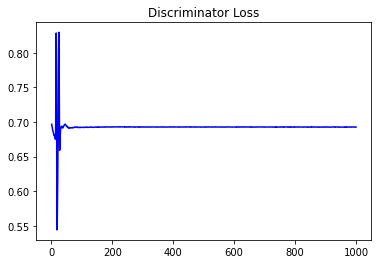

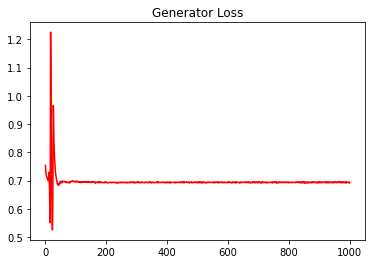

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.03410947038747903


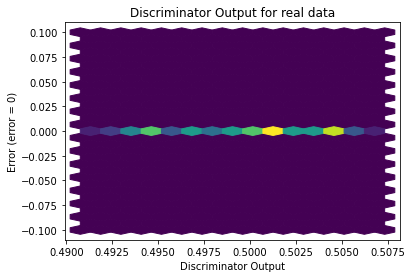

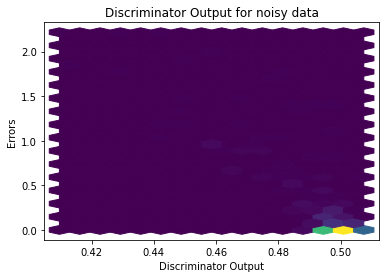

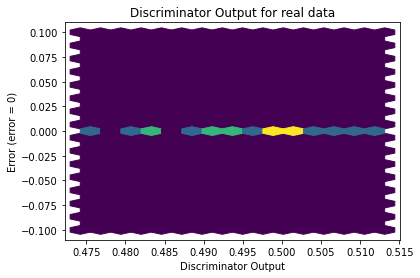

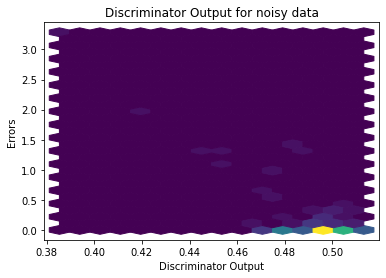

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


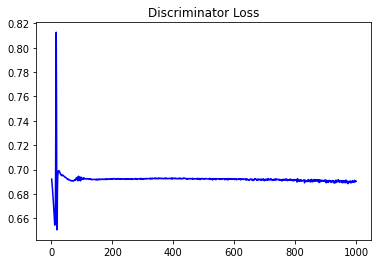

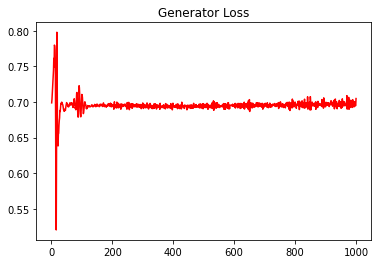

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.08749214483916186


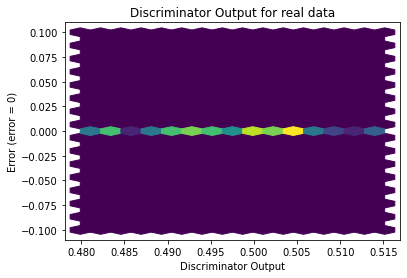

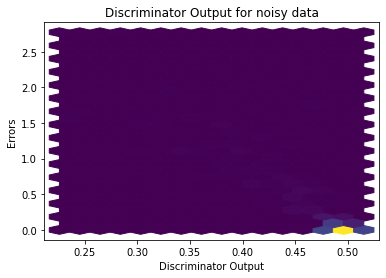

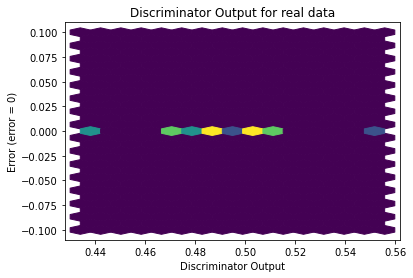

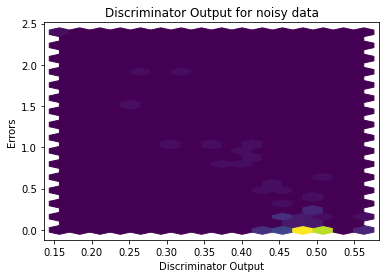

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0886]], requires_grad=True)
